In [ ]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
#from matplotlib import rcParams
#from mpl_toolkits.basemap import Basemap
#import sqlite3

In [3]:
ds = pd.read_csv('../data/Legally_Operating_Businesses.csv', header=0)

In [3]:
ds.head()

,DCA License Number,License Type,License Expiration Date,License Category,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Detail,Longitude,Latitude
0,1419313-DCA,Business,02/28/2017,Home Improvement Contractor,PMA CONSTRUCTION LLC,NaN,7960,68TH RD,NaN,MIDDLE VLG,NY,11379,3474462989,Queens,NaN,NaN,NaN
1,1438619-DCA,Business,02/28/2017,Home Improvement Contractor,BO CONSTRUCTION GROUP INC.,NaN,3907,PRINCE STREET #3B,NaN,FLUSHING,NY,11354,7186612826,Queens,NaN,NaN,NaN
2,2015403-DCA,Individual,02/28/2017,Home Improvement Salesperson,"ZWICK, ALEXANDER",NaN,2501,SEAPORT DR,NaN,CHESTER,PA,19013,9175135069,NaN,NaN,NaN,NaN
3,2039466-1-DCA,Business,12/31/2017,Cigarette Retail Dealer,EVERGREEN DELI AND GROCERY CORP,NaN,455,EVERGREEN AVE,NaN,BROOKLYN,NY,11221,9178634353,Brooklyn,NaN,NaN,NaN
4,1264825-DCA,Business,02/28/2017,Home Improvement Contractor,"ALAM, MOHAMMED N",M.N.A. CONSTRUCTION,224,QUINCY ST,NaN,BROOKLYN,NY,11216,7183630011,Brooklyn,NaN,NaN,NaN


In [4]:
ds.columns

Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Category', 'Business Name', 'Business Name 2',
       'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough', 'Detail',
       'Longitude', 'Latitude'],
      dtype='object')

In [5]:
len(ds[ds['Address ZIP'] != ds['Address ZIP']])

85

In [6]:
ds['Address ZIP'] = ds['Address ZIP'].fillna('nan')
len(ds[ds['Address ZIP'] != ds['Address ZIP']])

0

In [7]:
zips = list(ds['Address ZIP'])

In [8]:
zips[:10]

['11379',
 '11354',
 '19013',
 '11221',
 '11216',
 '11208',
 '10002',
 '10305',
 '11226',
 '11706']

In [9]:
wrong_zips_ix = [i for i in range(len(zips)) if len([x for x in list(zips[i]) if x in [str(x) for x in range(0,10)]])<5]

In [10]:
len(wrong_zips_ix)

132

In [11]:
#[ds['Address ZIP'][x] for x in wrong_zips_ix]

In [11]:
ds.index

RangeIndex(start=0, stop=77795, step=1)

In [12]:
ds = ds.drop(ds.index[wrong_zips_ix]).reindex()

In [13]:
len(ds)

77663

In [14]:
ds = ds[ds['Address State']=='NY']

In [15]:
ds['Address Borough'].unique()

array(['Queens', 'Brooklyn', nan, 'Manhattan', 'Outside NYC', 'Bronx',
       'Staten Island', 'MANHATTAN', 'QUEENS'], dtype=object)

In [16]:
ds['Address Borough'] = ds['Address Borough'].fillna('nan').apply(lambda x: x.lower())

In [17]:
ds['Address Borough'].unique()

array(['queens', 'brooklyn', 'nan', 'manhattan', 'outside nyc', 'bronx',
       'staten island'], dtype=object)

In [18]:
ds = ds[ds['Address Borough']!='nan']

In [19]:
ds.groupby('Address Borough').agg({'Address Borough':'count'})

,Address Borough
Address Borough,
bronx,6101
brooklyn,12825
manhattan,10872
outside nyc,3308
queens,12335
staten island,2840


In [20]:
ds['License Category'].unique()

array(['Home Improvement Contractor', 'Cigarette Retail Dealer',
       'Secondhand Dealer - General', 'Stoop Line Stand',
       'Dealer In Products', 'Electronics Store', 'Debt Collection Agency',
       'Cabaret', 'Laundry Jobber', 'Sidewalk Cafe',
       'Amusement Device Portable', 'Laundry', 'Horse Drawn Cab Owner',
       'Garage', 'Newsstand', 'Electronic & Appliance Service',
       'Storage Warehouse', 'Secondhand Dealer - Auto',
       'Employment Agency', 'Tow Truck Company', 'Pool or Billiard Room',
       'Parking Lot', 'Games of Chance', 'Catering Establishment',
       'Pawnbroker', 'Process Serving Agency', 'Pedicab Business',
       'Home Improvement Salesperson', 'Garage and Parking Lot',
       'Gaming Cafe', 'General Vendor', 'Scale Dealer Repairer',
       'Scrap Metal Processor', 'Amusement Device Permanent',
       'Amusement Arcade', 'Bingo Game Operator', 'Auction House Premises',
       'Sightseeing Bus', 'Tow Truck Exemption',
       'Secondhand Dealer - Fir

In [21]:
ds.groupby('License Category').agg({'License Category':'count'})

,License Category
License Category,
Amusement Arcade,20
Amusement Device Permanent,117
Amusement Device Portable,500
Amusement Device Temporary,6
Auction House Premises,31
Bingo Game Operator,61
Booting Company,3
Cabaret,137
Catering Establishment,57


In [62]:
ds_count = ds.groupby(['License Category','Address Borough']).agg({'License Category':'count'})

In [63]:
ds_count.columns = ['tot_count']

In [64]:
ds_count = ds_count.unstack().fillna(0)

In [67]:
ds_count.columns = ds_count.columns.droplevel(0)

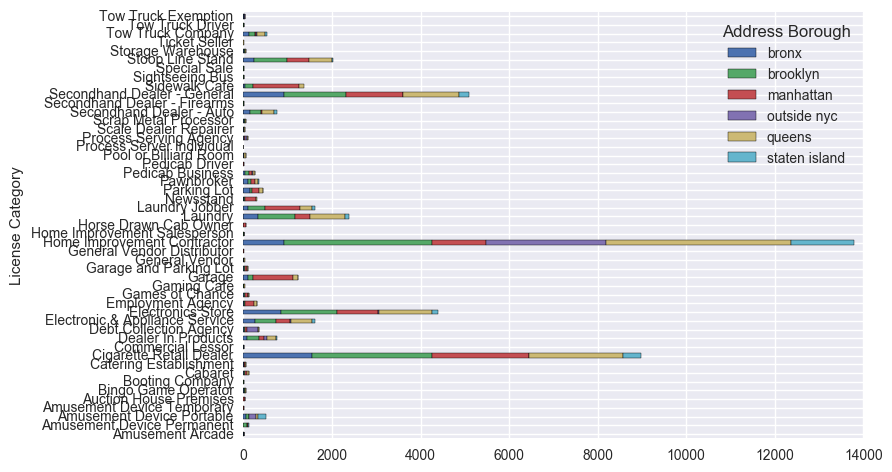

In [68]:
ds_count.plot.barh(stacked=True)

In [69]:
ds_count.head()

Address Borough,bronx,brooklyn,manhattan,outside nyc,queens,staten island
License Category,,,,,,
Amusement Arcade,2.0,9.0,4.0,0.0,4.0,1.0
Amusement Device Permanent,1.0,87.0,13.0,0.0,4.0,12.0
Amusement Device Portable,48.0,73.0,5.0,166.0,31.0,177.0
Amusement Device Temporary,0.0,1.0,2.0,0.0,3.0,0.0
Auction House Premises,1.0,0.0,24.0,1.0,5.0,0.0


In [70]:
ds_c2 = ds.groupby(['License Category','Address Borough']).agg({'License Category':'count'})

In [73]:
ds_c2.columns = ['tot_count']

In [76]:
ds_c2 = ds_c2.reset_index()

In [78]:
ds_c2['Address Borough'].unique()

array(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island',
       'outside nyc'], dtype=object)

In [79]:
ds_c2 = ds_c2[ds_c2['Address Borough']!='outside nyc']

In [80]:
ds_c2.to_csv('business_borough.csv')

In [81]:
ds_c2.head()

,License Category,Address Borough,tot_count
0,Amusement Arcade,bronx,2
1,Amusement Arcade,brooklyn,9
2,Amusement Arcade,manhattan,4
3,Amusement Arcade,queens,4
4,Amusement Arcade,staten island,1


In [141]:
ds_c3 = ds[['Address Borough', 'License Category']]

In [ ]:
ds_c3.loc[ds_c3['License Category'].apply(lambda x: x.lower()) == 'laundry jobber', 'License Category'] = 'Laundry'

In [146]:
boro_count = ds_c3.groupby('Address Borough').count()

In [147]:
boro_count.columns = ['boro_count']

In [148]:
boro_count = boro_count.reset_index()

In [149]:
boro_count

,Address Borough,boro_count
0,bronx,6101
1,brooklyn,12825
2,manhattan,10872
3,outside nyc,3308
4,queens,12335
5,staten island,2840


In [150]:
ds_c3 = pd.merge(ds_c3, boro_count, on='Address Borough')

In [151]:
typeboro_count = ds_c3.groupby(['Address Borough','License Category']).count()

In [152]:
typeboro_count.columns = ['typeboro_count']

In [153]:
typeboro_count = typeboro_count.reset_index()

In [154]:
ds_c3 = pd.merge(ds_c3, typeboro_count, on=['Address Borough','License Category'])

In [155]:
ds_c3 = ds_c3.drop_duplicates().reset_index().drop(['index'], axis=1)

In [156]:
ds_c3['%_boro'] = ds_c3['typeboro_count'] / ds_c3['boro_count']

In [157]:
ds_c3.head()

,Address Borough,License Category,boro_count,typeboro_count,%_boro
0,queens,Home Improvement Contractor,12335,4171,0.338143
1,queens,Cigarette Retail Dealer,12335,2115,0.171463
2,queens,Electronics Store,12335,1202,0.097446
3,queens,Secondhand Dealer - General,12335,1264,0.102473
4,queens,Laundry,12335,1056,0.085610


In [158]:
ds_c3 = ds_c3[ds_c3['Address Borough']!='outside nyc']

In [159]:
len(ds_c3[ds_c3['%_boro']>=.1])

16

In [160]:
ds_c3[ds_c3['%_boro']>=.05]

,Address Borough,License Category,boro_count,typeboro_count,%_boro
0,queens,Home Improvement Contractor,12335,4171,0.338143
1,queens,Cigarette Retail Dealer,12335,2115,0.171463
2,queens,Electronics Store,12335,1202,0.097446
3,queens,Secondhand Dealer - General,12335,1264,0.102473
4,queens,Laundry,12335,1056,0.085610
42,brooklyn,Cigarette Retail Dealer,12825,2725,0.212476
43,brooklyn,Home Improvement Contractor,12825,3339,0.260351
44,brooklyn,Stoop Line Stand,12825,745,0.058090
46,brooklyn,Laundry,12825,1234,0.096218
47,brooklyn,Secondhand Dealer - General,12825,1401,0.109240


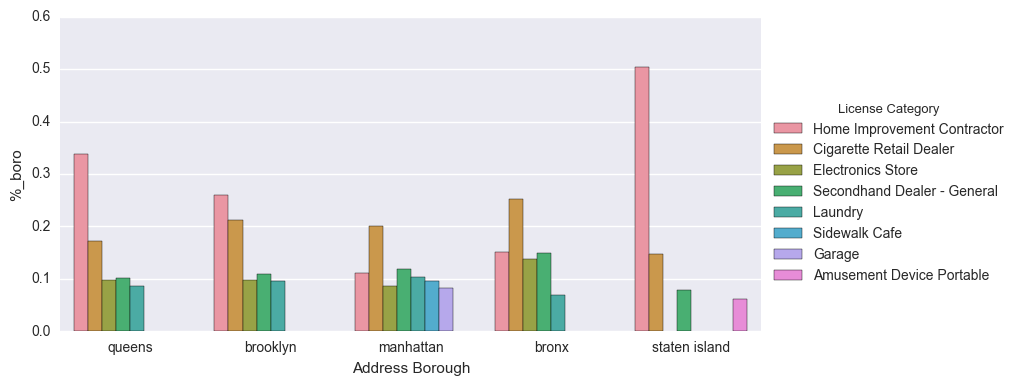

In [162]:
boroughs_plot = sns.factorplot(x='Address Borough', y='%_boro',
               hue='License Category',
               data=ds_c3[ds_c3['%_boro']>=.06],
               kind='bar',
              aspect = 2)

In [163]:
boroughs_plot.savefig('boroghs_plot.png')